# Ch 6. Data Structures (Trees)

## Binary Tree
- **binary tree**: empty or root + up to two binary trees in left and right
- **full binary tree**: empty or both left and right subtrees are full
- **complete binary tree**: full to level h-1, level h fill in from left to right
- Unless tree is full/complete, reference-based implementation is more efficient than array-based.

### Tree traversal
=> visit all nodes once!
- Preorder: Root- left- right
- Inorder: Left - root - right
- Postorder: Left - right - root

In [172]:
class TreeNode():
    def __init__(self,x):
        self.item = x
        self.right = None
        self.left  = None
        
def preorder(node):
    if node is not None:
        print(node.item)
        preorder(node.left)
        preorder(node.right)
        
def inorder(node):
    if node is not None:
        inorder(node.left)
        print(node.item)
        inorder(node.right)
    
def postorder(node):
    if node is not None:
        postorder(node.left)
        postorder(node.right)
        print(node.item)

In [138]:
new_tree = TreeNode(60)
new_tree.left = TreeNode(20)
new_tree.right = TreeNode(30)
preorder(new_tree)

60
20
30


In [139]:
inorder(new_tree)

20
60
30


In [140]:
postorder(new_tree)

20
30
60


## Binary Search Tree
- no duplicates 
- root greater than left node, smaller than right node
- both left and right are binary search trees

### Search (Retrieval)
- if balanced, closer to O(log(N))
- if unbalanced, closer to O(N)

### Insertion
- failed search -> search until reaching a leaf then insert!

### Deletion
- leaf -> just delete
- single child -> child takes over its position 
- both children -> immediate successor (left-most node in the right subtree OR right-most node in the left subtree) takes over the position, and its right(OR left) child (if any) is put in its original spot.

### Shape
- determined by the insertion order

In [8]:
class TreeNode():
    def __init__(self,x):
        self.item = x
        self.right = None
        self.left  = None
        
def search(root, key):
    while root is not None:
        if key == root.item:
            return root
        elif key < root.item:
            if root.left is not None:
                root = root.left  # or recursion outside class
            else:
                return "not in tree"
        else:
            if root.right is not None:
                root = root.right # or recursion outside class
            else:
                return "not in tree"     

    
def insert(root, new_item):
    if root is None:
        return TreeNode(new_item)
    elif new_item == root.item:
        print("error")
    elif new_item < root.item:
        root.left = insert(root.left, new_item)
        return root
    elif new_item > root.item:
        root.right = insert(root.right, new_item) 
        return root
    
    
def get_immediate_successor_node(target):
    curr = target.right
    while curr.left is not None:
        curr = curr.left
    return curr    
    
def delete(root, target):
    if search(root, target) != "not in tree":
        target = search(root,target)
        # Case 1: leaf
        if target.left is None and target.right is None:
            target.item = None
        # Case 2: single child
        elif target.right is None:
            target.item = target.left.item
            target.right = target.left.right
            target.left = target.left.left
        elif target.left is None:
            target.item = target.right.item
            target.right = target.right.right
            target.left = target.left.left
        #Case 3: both children
        else:
            #left most node in right subtree
            im_su = get_immediate_successor_node(target)
            target.item = im_su.item
            #no right child left
            if im_su.right is None:
                im_su.item = None #ERROR: doesn't delete
            #right child adopted
            else:
                im_su.item = im_su.right.item
                im_su.left = im_su.right.left
                im_su.right = im_su.right.right

In [2]:
def print_tree(node, level=0):
    if node != None:
        print_tree(node.right, level+1)
        print(' ' * 4 * level + '-> ' + str(node.item))
        print_tree(node.left, level+1)

In [9]:
bs_tree = TreeNode(60)
insert(bs_tree, 20)
insert(bs_tree, 70)
insert(bs_tree, 10)
insert(bs_tree, 40)
insert(bs_tree, 30)
#insert(bs_tree, 35) #when deleted, 30 2번 나옴
insert(bs_tree, 50)
print_tree(bs_tree)

    -> 70
-> 60
            -> 50
        -> 40
            -> 30
    -> 20
        -> 10


In [5]:
search(bs_tree, 10), search(bs_tree,55)

(<__main__.TreeNode at 0x275373d3be0>, 'not in tree')

In [6]:
delete(bs_tree,20)

In [7]:
print_tree(bs_tree)

    -> 70
-> 60
            -> 50
        -> 40
            -> 30
    -> 30
        -> 10


 binary search tree를 활용할 때, key만 사용하는 것이 아니라 key/value pair를 사용할 수 있다?

### Sorting by inorder traversal

In [233]:
inorder(bs_tree)

10
30
35
40
50
60
70


### Time complexity
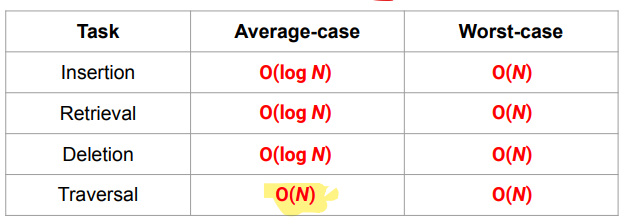

### Test if a binary tree is balanced.

In [252]:
def get_height(root):
    if root is None: 
        return 0
    return 1 + max(get_height(root.left), get_height(root.right))

def isBalanced(root):
    if root is None:
        return True
    condition = abs(get_height(root.left)-get_height(root.right)) <= 1
    return isBalanced(root.left) and isBalanced(root.right) and condition

In [253]:
print(bs_tree)
isBalanced(bs_tree)

False

In [254]:
bs_tree2 = TreeNode(60)
insert(bs_tree2, 20)
insert(bs_tree2, 10)
insert(bs_tree2, 70)
insert(bs_tree2, 40)
print_tree(bs_tree2)

    -> 70
-> 60
        -> 40
    -> 20
        -> 10


In [255]:
isBalanced(bs_tree2)

True

### Test if a binary tree is symmetric.

In [227]:
def isSymmetric(root):
    if (root.left !b= None) and (root.right != None):
        if root.left.val == root.right.val:
            left = root.left
            right = root.right
            
            ## After swapping, left & right node should be the same
            left.right, right.right = right.right, left.right
            return isSymmetric(left) and isSymmetric(right)
        
        else:
            return False
    elif (root.left is None) and (root.right is None):
        return True
    else:
        return False

### Given a sorted list of items, build a balanced binary search tree

In [264]:
def build_balanced_tree(sorted_list):
    n = len(sorted_list)
    if n==0:
        return None
    med = n//2
    #Set the median item r to be the root
    r = TreeNode(sorted_list[med])
    r.left = build_balanced_tree(sorted_list[:med])
    r.right = build_balanced_tree(sorted_list[med+1:])
    return r

In [267]:
bl_tree = build_balanced_tree([10,20,25,30,40,50,60])
print_tree(bl_tree)

        -> 60
    -> 50
        -> 40
-> 30
        -> 25
    -> 20
        -> 10
